Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in data preprocessing for machine learning and data analysis. It transforms a large set of correlated features into a smaller set of uncorrelated features, called "principal components," without significant loss of information. Here’s a detailed explanation of PCA and how it’s used:

### 1. **Understanding PCA**:
   - **Dimensionality Reduction**: In many datasets, features (variables) can be highly correlated and contribute redundant information, leading to a phenomenon known as the "curse of dimensionality." Higher dimensions increase computational complexity and often reduce model interpretability. PCA addresses this by reducing the number of dimensions.
   - **Principal Components**: PCA converts correlated features into a set of linearly uncorrelated components. These new components are called "principal components." Each component is a linear combination of the original features, and they are ordered so that the first few retain most of the variance in the dataset.
   - **Variance Maximization**: PCA’s goal is to capture the most information in the data by maximizing variance. It identifies directions (principal components) along which the data varies the most. The principal component with the highest variance becomes the first component, the second highest variance becomes the second component, and so on.
   - **Orthogonal Transformation**: Principal components are orthogonal (perpendicular) to each other, ensuring that they are uncorrelated.

### 2. **Steps in PCA**:
   - **Standardization**: PCA is sensitive to the scale of data, so it’s important to standardize the data (mean = 0, standard deviation = 1) before applying PCA.
   - **Covariance Matrix Calculation**: The covariance matrix measures how variables change with each other, capturing the relationships between features.
   - **Eigenvalues and Eigenvectors**: The next step is to calculate the eigenvalues and eigenvectors of the covariance matrix. Eigenvectors represent directions in the feature space, while eigenvalues indicate the magnitude (variance) of data along these directions.
   - **Selecting Principal Components**: Eigenvalues help rank the eigenvectors by importance. We select the top `k` eigenvectors as our principal components, where `k` is typically chosen based on the amount of variance we want to retain.
   - **Projection onto Principal Components**: Finally, the data is projected onto the selected principal components, reducing the original dataset’s dimensions.

### 3. **Usage of PCA**:
   - **Data Visualization**: PCA helps visualize high-dimensional data by reducing it to 2 or 3 dimensions. This is especially useful for understanding data structure and relationships in fields like genomics, image processing, and more.
   - **Feature Extraction and Noise Reduction**: PCA can help remove noise and redundant information by reducing features, which enhances the signal-to-noise ratio. This is common in applications like image compression and signal processing.
   - **Preprocessing for Machine Learning**: PCA is often used to preprocess data before training machine learning models. Reducing the number of features helps avoid overfitting, lowers computational costs, and can improve model performance for certain algorithms.

### 4. **Advantages of PCA**:
   - **Computational Efficiency**: Reducing dimensions lowers computational requirements, especially for algorithms that scale poorly with large numbers of features.
   - **Reduces Overfitting**: By removing noise and irrelevant features, PCA helps prevent overfitting, particularly in high-dimensional datasets with a limited number of samples.
   - **Improves Model Interpretability**: Reducing features can make the model simpler and more interpretable.

### 5. **Limitations of PCA**:
   - **Loss of Interpretability**: Principal components are combinations of the original features, so the new components may not have intuitive meanings.
   - **Linear Assumptions**: PCA assumes that the directions of maximum variance capture the most important information, which may not hold for non-linear relationships.
   - **Variance-Based**: PCA may capture noise as part of the variance, especially if there’s high variance in noise within the data.

### 6. **Applications of PCA**:
   - **Image Processing**: PCA is widely used for image compression and feature extraction. For instance, it can reduce the size of image data while retaining important features for recognition tasks.
   - **Gene Expression Analysis**: In bioinformatics, PCA is used to reduce the dimensionality of gene expression data, making it easier to analyze the genetic variations and similarities.
   - **Finance**: PCA is used to identify underlying factors in financial data, such as stock returns, where it helps to find the main trends affecting market movements.
   - **Customer Segmentation**: In marketing, PCA helps reduce customer data to a manageable size while retaining key patterns, enabling more effective segmentation and targeting.

### In summary:
PCA transforms the data into a new set of features that maximally explain variance, improving computational efficiency and simplifying the dataset while retaining most of its original information. This makes PCA a powerful tool in high-dimensional data preprocessing and analysis.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import zscore

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
digits.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

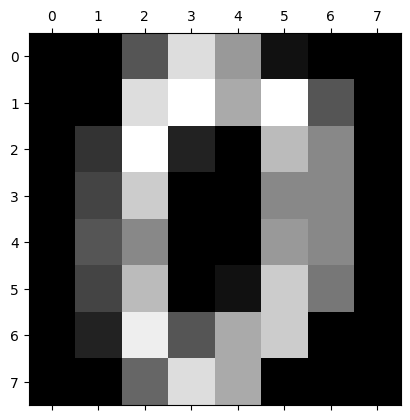

In [7]:
plt.gray()
plt.matshow(digits.data[0].reshape(8,8))

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
digits_data = pd.DataFrame(digits.data, columns= digits.feature_names)
digits_data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
digits_data.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [11]:
X = digits_data
y = digits.target

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
digits_model = LogisticRegression()
digits_model.fit(X_train, y_train)
digits_model.score(X_test, y_test)

0.9722222222222222

In [15]:
X.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [16]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [17]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [18]:
pca.n_components_

29

In [19]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [20]:
digits_model = LogisticRegression(max_iter=300)
digits_model.fit(X_train_pca, y_train)
digits_model.score(X_test_pca, y_test)

0.9611111111111111

In [21]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [22]:
X_pca

array([[ -1.25946633,  21.27488372],
       [  7.95761235, -20.76869944],
       [  6.99192243,  -9.95598653],
       ...,
       [ 10.80128239,  -6.96025177],
       [ -4.87209813,  12.4239535 ],
       [ -0.34439148,   6.3655499 ]])

In [23]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771])

In [24]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
digits_model = LogisticRegression(max_iter=500)
digits_model.fit(X_train_pca, y_train)
digits_model.score(X_test_pca, y_test)

0.6472222222222223

In [25]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 10)

In [26]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
digits_model = LogisticRegression(max_iter=1000)
digits_model.fit(X_train_pca, y_train)
digits_model.score(X_test_pca, y_test)

0.9305555555555556

## Exercise
Download heart disease dataset heart.csv in Exercise folder and do following, (credits of dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction)

Load heart disease dataset in pandas dataframe

Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3

Convert text columns to numbers using label encoding and one hot encoding

Apply scaling

Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life.

In [27]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [28]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [29]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [31]:
df.shape

(918, 12)

**Remove Outliers Using Z-Score**

In [32]:
z_score = df.select_dtypes(include=['float64', 'int64']).apply(zscore)
z_score

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,-1.113115
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,0.898380
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,-1.113115
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,0.898380
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,-1.113115
...,...,...,...,...,...,...,...
913,-0.902775,-1.210356,0.596393,-0.551341,-0.188999,0.293283,0.898380
914,1.536902,0.627078,-0.053049,1.813758,0.164684,2.357094,0.898380
915,0.370100,-0.129513,-0.620168,-0.551341,-0.857069,0.293283,0.898380
916,0.370100,-0.129513,0.340275,-0.551341,1.461525,-0.832432,0.898380


In [33]:
df_no_outliers = df[(z_score < 3).all(axis=1)]
df_no_outliers.reset_index(drop=True, inplace=True)

In [34]:
df_no_outliers.shape

(902, 12)

In [35]:
df_new = df_no_outliers
df_new.shape

(902, 12)

**Convert Text Columns to Numeric Using Label Encoding and One-Hot Encoding**

In [36]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [37]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [38]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [39]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [40]:
df_no_label  = df_new.copy()
df_no_label.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [41]:
df_no_label.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

df_no_label.ST_Slope.replace(
    {
        'Up': 0,
        'Flat': 1,
        'Down': 2
    },
    inplace=True)

df_no_label.RestingECG.replace(
    {
        'Normal': 0,
        'ST': 1,
        'LVH': 2  
    },
    inplace=True)

df_no_label.ChestPainType.replace(
    {
        'ATA': 0,
        'NAP': 1,
        'ASY': 2,
        'TA': 3
    },
    inplace=True)

df_no_label.head()

C:\Users\Al hamad\AppData\Local\Temp\ipykernel_10000\257555495.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_no_label.ExerciseAngina.replace(
C:\Users\Al hamad\AppData\Local\Temp\ipykernel_10000\257555495.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_no_label.ExerciseAngina.replace

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,0,140,289,0,0,172,0,0.0,0,0
1,49,F,1,160,180,0,0,156,0,1.0,1,1
2,37,M,0,130,283,0,1,98,0,0.0,0,0
3,48,F,2,138,214,0,0,108,1,1.5,1,1
4,54,M,1,150,195,0,0,122,0,0.0,0,0


In [42]:
# Replace values using .loc, which avoids chained assignment issues
df_no_label.loc[:, 'ExerciseAngina'] = df_no_label['ExerciseAngina'].replace({'Y': 1, 'N': 0})
df_no_label.loc[:, 'ST_Slope'] = df_no_label['ST_Slope'].replace({'Up': 2, 'Flat': 1, 'Down': 0})
df_no_label.loc[:, 'RestingECG'] = df_no_label['RestingECG'].replace({'Normal': 1, 'ST': 2, 'LVH': 0})
df_no_label.loc[:, 'ChestPainType'] = df_no_label['ChestPainType'].replace({'ASY': 0, 'NAP': 1, 'ATA': 2, 'TA': 3})

In [43]:
# Replace and reassign the DataFrame to avoid inplace modification warning
df_no_label = df_no_label.replace({
    'ExerciseAngina': {'Y': 1, 'N': 0},
    'ST_Slope': {'Up': 2, 'Flat': 1, 'Down': 0},
    'RestingECG': {'Normal': 1, 'ST': 2, 'LVH': 0},
    'ChestPainType': {'ASY': 0, 'NAP': 1, 'ATA': 2, 'TA': 3}
})

In [44]:
df_no_label.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,0,140,289,0,0,172,0,0.0,0,0
1,49,F,1,160,180,0,0,156,0,1.0,1,1
2,37,M,0,130,283,0,1,98,0,0.0,0,0
3,48,F,2,138,214,0,0,108,1,1.5,1,1
4,54,M,1,150,195,0,0,122,0,0.0,0,0


In [45]:
df_no_label.shape

(902, 12)

In [46]:
df_encoded = pd.get_dummies(df_no_label, drop_first=True)
df_encoded.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M
0,40,0,140,289,0,0,172,0,0.0,0,0,True
1,49,1,160,180,0,0,156,0,1.0,1,1,False
2,37,0,130,283,0,1,98,0,0.0,0,0,True
3,48,2,138,214,0,0,108,1,1.5,1,1,False
4,54,1,150,195,0,0,122,0,0.0,0,0,True


In [47]:
X = df_encoded.drop('HeartDisease', axis='columns')
y = df_encoded.HeartDisease
X.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M
0,40,0,140,289,0,0,172,0,0.0,0,True
1,49,1,160,180,0,0,156,0,1.0,1,False
2,37,0,130,283,0,1,98,0,0.0,0,True
3,48,2,138,214,0,0,108,1,1.5,1,False
4,54,1,150,195,0,0,122,0,0.0,0,True


**Apply Scaling**

In [48]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale

array([[-1.42896269, -1.6990351 ,  0.46089071, ..., -0.84676261,
        -1.0456339 ,  0.51485643],
       [-0.47545956, -0.52558207,  1.5925728 , ...,  0.14079864,
         0.62072967, -1.94228905],
       [-1.74679706, -1.6990351 , -0.10495034, ..., -0.84676261,
        -1.0456339 ,  0.51485643],
       ...,
       [ 0.37209878,  0.64787097, -0.10495034, ...,  0.33831089,
         0.62072967,  0.51485643],
       [ 0.37209878, -1.6990351 , -0.10495034, ..., -0.84676261,
         0.62072967, -1.94228905],
       [-1.64085227, -0.52558207,  0.3477225 , ..., -0.84676261,
        -1.0456339 ,  0.51485643]])

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)
len(X_train)

721

In [50]:
len(X_scale)

902

In [51]:
X_train.shape

(721, 11)

**Build Classification Models and Evaluate Accuracy**

In [52]:
svm_model = SVC()
svm_model.fit(X_test, y_test)
svm_model.score(X_test, y_test)

0.9116022099447514

**Using PCA to reduce dimensions on SVM**

In [53]:
X_scale

array([[-1.42896269, -1.6990351 ,  0.46089071, ..., -0.84676261,
        -1.0456339 ,  0.51485643],
       [-0.47545956, -0.52558207,  1.5925728 , ...,  0.14079864,
         0.62072967, -1.94228905],
       [-1.74679706, -1.6990351 , -0.10495034, ..., -0.84676261,
        -1.0456339 ,  0.51485643],
       ...,
       [ 0.37209878,  0.64787097, -0.10495034, ...,  0.33831089,
         0.62072967,  0.51485643],
       [ 0.37209878, -1.6990351 , -0.10495034, ..., -0.84676261,
         0.62072967, -1.94228905],
       [-1.64085227, -0.52558207,  0.3477225 , ..., -0.84676261,
        -1.0456339 ,  0.51485643]])

In [54]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scale)
X_pca

array([[-2.81698603,  0.18022275,  0.42682335, ..., -0.12203666,
         0.14832265,  0.25695677],
       [-0.96053832,  1.03252076, -0.15602492, ...,  1.24674527,
         0.7615084 ,  0.96433952],
       [-1.7988877 , -0.15055174,  0.15992329, ..., -1.23471051,
         0.53943529,  1.02823459],
       ...,
       [ 1.56020606, -0.53083033,  1.04931432, ...,  0.11947247,
         0.15536378, -0.28433892],
       [-1.83161862,  1.63268505, -1.19351472, ...,  0.36719844,
         0.92486688,  0.75010209],
       [-2.34147556, -0.58786068,  0.48156876, ...,  0.49203788,
         0.42854491,  0.12663896]])

In [55]:
X_pca.shape

(902, 10)

In [56]:
pca.explained_variance_ratio_

array([0.26327776, 0.130267  , 0.10514106, 0.08972188, 0.07946125,
       0.07538035, 0.06460631, 0.05524779, 0.05387277, 0.04537341])

In [57]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
svm_model = SVC()
svm_model.fit(X_test_pca, y_test)
svm_model.score(X_test_pca, y_test)

0.9116022099447514

In [58]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scale)
X_pca.shape

(902, 5)

In [59]:
pca.explained_variance_ratio_

array([0.26327776, 0.130267  , 0.10514106, 0.08972188, 0.07946125])

In [60]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
svm_model = SVC()
svm_model.fit(X_test_pca, y_test)
svm_model.score(X_test_pca, y_test)

0.8729281767955801

**Classification on Logistic Regression with PCA**

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_model.score(X_test, y_test)

0.8397790055248618

In [62]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scale)
X_pca

array([[-2.81698603,  0.18022275,  0.42682335, ..., -0.12203666,
         0.14832265,  0.25695677],
       [-0.96053832,  1.03252076, -0.15602492, ...,  1.24674527,
         0.7615084 ,  0.96433952],
       [-1.7988877 , -0.15055174,  0.15992329, ..., -1.23471051,
         0.53943529,  1.02823459],
       ...,
       [ 1.56020606, -0.53083033,  1.04931432, ...,  0.11947247,
         0.15536378, -0.28433892],
       [-1.83161862,  1.63268505, -1.19351472, ...,  0.36719844,
         0.92486688,  0.75010209],
       [-2.34147556, -0.58786068,  0.48156876, ...,  0.49203788,
         0.42854491,  0.12663896]])

In [63]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
lr_model = SVC()
lr_model.fit(X_test_pca, y_test)
lr_model.score(X_test_pca, y_test)

0.9116022099447514

**PCA on Random Forest Classifier**

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
rfc_model.score(X_test, y_test)

0.861878453038674

In [65]:
pca = PCA(0.95)
X_pca = pca.fit_transform(X_scale)
X_pca

array([[-2.81698603,  0.18022275,  0.42682335, ..., -0.12203666,
         0.14832265,  0.25695677],
       [-0.96053832,  1.03252076, -0.15602492, ...,  1.24674527,
         0.7615084 ,  0.96433952],
       [-1.7988877 , -0.15055174,  0.15992329, ..., -1.23471051,
         0.53943529,  1.02823459],
       ...,
       [ 1.56020606, -0.53083033,  1.04931432, ...,  0.11947247,
         0.15536378, -0.28433892],
       [-1.83161862,  1.63268505, -1.19351472, ...,  0.36719844,
         0.92486688,  0.75010209],
       [-2.34147556, -0.58786068,  0.48156876, ...,  0.49203788,
         0.42854491,  0.12663896]])

In [66]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
rfc_model = RandomForestClassifier()
rfc_model.fit(X_test_pca, y_test)
rfc_model.score(X_test_pca, y_test)

1.0

**Another way of doing classfication on multiple model at once:**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=42)

In [68]:
svm_model = SVC()
log_reg_model = LogisticRegression()
rf_model = RandomForestClassifier()

In [69]:
models = {
    'SVM': svm_model,
    'Logistic Regression': log_reg_model,
    'Random Forest': rf_model
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")

SVM Accuracy: 0.87
Logistic Regression Accuracy: 0.84
Random Forest Accuracy: 0.87


In [70]:
pca = PCA(n_components=3)
x_pca = pca.fit_transform(X_scale)
x_pca.shape

(902, 3)

In [71]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [72]:
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy_pca:.2f}")

SVM Accuracy: 0.87
Logistic Regression Accuracy: 0.83
Random Forest Accuracy: 0.87
